# Fitting Logistic Growth Curves

In [1]:
import phenotypic as pht

meas = pht.data.load_meas()
meas

,Metadata_Condition,Metadata_Media,Metadata_Set,Metadata_Replicate,Metadata_Time,Metadata_Strain,Metadata_FileName,Bbox_CenterRR,Bbox_CenterCC,Bbox_MinRR,...,Shape_MinorAxisLength,Shape_Compactness,Metadata_StrainID,Metadata_BitDepth,Metadata_ImageType,Metadata_ParentImageName,Metadata_ImageName,ObjectLabel,CorrectedCarryingCapacity_Area,Metadata_Dataset
5906,30C,S,1,6,24,NRRLY-1008,2_1S_6,1117.100629,302.477987,1107,...,9.613907,1.270550,76,NaN,NaN,NaN,NaN,NaN,2863.333333,S 30C
5907,30C,S,1,5,24,NRRLY-1008,2_1S_5,1055.222222,283.771605,1051,...,10.012105,1.206351,76,NaN,NaN,NaN,NaN,NaN,2967.333333,S 30C
5908,30C,S,1,8,24,NRRLY-1008,2_1S_8,1072.920635,375.698413,1067,...,10.890738,1.000377,76,NaN,NaN,NaN,NaN,NaN,2905.666667,S 30C
5909,30C,S,1,1,36,NRRLY-1008,3_1S_1,1191.092025,274.153374,1185,...,12.924680,0.972313,76,NaN,NaN,NaN,NaN,NaN,4839.333333,S 30C
5910,30C,S,1,6,36,NRRLY-1008,3_1S_6,1118.209964,282.192171,1104,...,11.752167,1.658487,76,NaN,NaN,NaN,NaN,NaN,2863.333333,S 30C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12160,30C,S,1,1,72,UCDFST55-2,6_1S_1,1105.888664,443.110662,1069,...,75.014395,1.116099,77,NaN,NaN,NaN,NaN,NaN,4839.333333,S 30C
12161,30C,S,1,11,72,UCDFST55-2,6_1S_11,1095.195896,458.018564,1068,...,48.996466,1.175955,77,NaN,NaN,NaN,NaN,NaN,2996.333333,S 30C
12162,30C,S,1,5,72,UCDFST55-2,6_1S_5,1033.630376,441.767473,1021,...,22.018426,1.309995,77,NaN,NaN,NaN,NaN,NaN,2967.333333,S 30C
12163,30C,S,1,4,72,UCDFST55-2,6_1S_4,1209.737483,482.307442,1176,...,67.487214,1.084568,77,NaN,NaN,NaN,NaN,NaN,4045.333333,S 30C


## Fit model

In [6]:
log_model = pht.analysis.LogGrowthModel(on='Shape_Area', groupby=['Metadata_Strain'],
                                        agg_func='mean',
                                        time_label='Metadata_Time',
                                        n_jobs=-1)
model_fit = log_model.analyze(meas)
model_fit

,Metadata_Strain,LogGrowthModel_r,LogGrowthModel_K,LogGrowthModel_N0,LogGrowthModel_d(N)/dt,LogGrowthModel_Kmax,LogGrowthModel_NumSamples,LogGrowthModel_OptimizerLoss,LogGrowthModel_OptimizerStatus,LogGrowthModel_MAE,LogGrowthModel_MSE,LogGrowthModel_RMSE
0,NRRLY-1008,0.241984,1698.819712,0.053759,102.771955,1870.181818,5,53954.744719,2,124.652917,19046.989189,138.010830
1,NRRLY-1052,0.322841,2202.436453,65.471027,177.759371,2340.666667,5,66695.959993,0,123.232595,18066.015968,134.409880
2,NRRLY-108,0.177726,2260.502466,106.506796,100.437783,2536.727273,5,108485.162278,2,180.134609,38250.503716,195.577360
3,NRRLY-10935,0.089535,2889.536491,329.468811,64.678809,3107.138889,5,255822.610294,2,239.427296,75273.107319,274.359449
4,NRRLY-10987,0.129070,3134.481108,239.566644,101.141919,3352.638889,5,180357.412536,2,221.400912,55913.712412,236.460805
...,...,...,...,...,...,...,...,...,...,...,...,...
87,NRRLY-87,0.249823,2374.510039,67.304416,148.301585,2703.833333,5,128931.936494,2,179.454909,45207.178093,212.619797
88,NRRLY-872,0.256763,2294.140364,65.285568,147.262736,2539.727273,5,68978.847308,2,116.207262,21363.883219,146.163892
89,NRRLY-876,0.094707,2447.666667,74.129006,57.952666,2447.666667,5,21657.021789,4,80.736260,6537.939660,80.857527
90,NRRLY-91,0.280152,2509.084411,72.641805,175.731316,2796.000000,5,138454.640932,2,182.658390,46703.845209,216.110724


## Display results

(<Figure size 600x400 with 1 Axes>, <Axes: >)

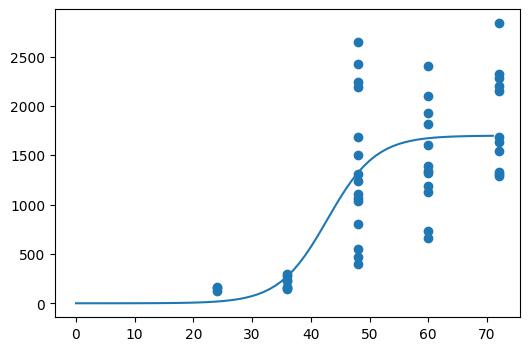

In [7]:
log_model.show(criteria={'Metadata_Strain': ['NRRLY-1008']})